/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)



Confusion matrix
 [[35483  4539]
 [19010  6324]]

True Positive 35483
True Negative 6324
False Positive 4539
False Negative 19010
              precision    recall  f1-score   support

         0.0       0.65      0.89      0.75     40022
         1.0       0.58      0.25      0.35     25334

    accuracy                           0.64     65356
   macro avg       0.62      0.57      0.55     65356
weighted avg       0.62      0.64      0.60     65356


Accuracy score: 0.6397
Precision score: 0.5822
Recall score: 0.2496
F1 score: 0.3494
ROC AUC: 0.5681
Specificity: 0.8866
Sensitivity: 0.2496


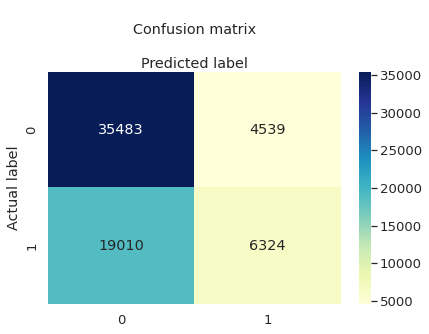

In [ ]:
# Logistic Regression
import pandas as pd   
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import preprocessing

data = pd.read_csv("/content/mexico_covid19.csv")
data = data.drop([1048574])
data = data.dropna()
data = data.drop(data[(data['Age'] < 0) | (data['Sex'] == 98) | (data['Pneumonia'] == 98) | (data['Diabetes'] == 98) | (data['Ashma'] == 98) | (data['Hypertension'] == 98) | (data['CVDs'] == 98) | (data['Obesity'] == 98) |  (data['Result'] == 98) | (data['CKDs'] == 98) | (data['Tabacco'] == 98)].index)


scaler = preprocessing.MinMaxScaler()
x = data.values.astype(float)
x_scaled = scaler.fit_transform(x)
data = pd.DataFrame(x_scaled, columns=data.columns)

cv_score = []
x = data.drop(['Result'], axis=1)
y = data.Result
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=4)

log_data = LogisticRegression()
log_data.fit(x_train, y_train)


y_pred = log_data.predict(x_test)

y_pred_train = log_data.predict(x_train)

# Confusion matrix 
cm = metrics.confusion_matrix(y_test, y_pred)
print('\nConfusion matrix\n', cm)
print('\nTrue Positive', cm[0,0])
print('True Negative', cm[1,1])
print('False Positive', cm[0,1])
print('False Negative', cm[1,0])

# Classification report
print(metrics.classification_report(y_test, y_pred))

# create heatmap
fig, ax = plt.subplots()
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='d')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('\nConfusion matrix\n', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

log_reg_accuracy = metrics.accuracy_score(y_test, y_pred)
print('\nAccuracy score: {:.4f}'.format(log_reg_accuracy))

log_reg_precision = metrics.precision_score(y_test, y_pred)
print('Precision score: {:.4f}'.format(log_reg_precision))

log_reg_recall = metrics.recall_score(y_test, y_pred)
print('Recall score: {:.4f}'.format(log_reg_recall))

log_reg_f1_score = metrics.f1_score(y_test, y_pred)
print('F1 score: {:.4f}'.format(log_reg_f1_score))

log_reg_ROC_ACC = metrics.roc_auc_score(y_test, y_pred)
print('ROC AUC: {:.4f}'.format(log_reg_ROC_ACC))

log_reg_specificity = cm[0, 0] / (cm[0, 0] + cm[0, 1])
print('Specificity: {:.4f}'.format(log_reg_specificity))

log_reg_sensitivity =  cm[1, 1] / (cm[1, 0] + cm[1, 1])
print('Sensitivity: {:.4f}'.format(log_reg_sensitivity))

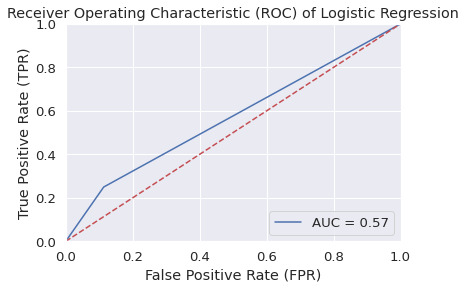

In [ ]:
# ROC Curve of Logistic Regression

fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred)

roc_auc = metrics.auc(fpr, tpr)

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate (TPR)')
plt.xlabel('False Positive Rate (FPR)')
plt.title('Receiver Operating Characteristic (ROC) of Logistic Regression')
plt.legend(loc='lower right')
plt.show()


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)



Confusion matrix
 [[35988  4034]
 [20872  4462]]

True Positive:  35988
True Negative:  4462
False Positive:  4034
False Negative:  20872
              precision    recall  f1-score   support

         0.0       0.63      0.90      0.74     40022
         1.0       0.53      0.18      0.26     25334

    accuracy                           0.62     65356
   macro avg       0.58      0.54      0.50     65356
weighted avg       0.59      0.62      0.56     65356


Accuracy score: 0.6189
Precision score: 0.5252
Recall score: 0.1761
F1 score: 0.2638
ROC AUC: 0.5377
Specificity: 0.8992
Sensitivity: 0.1761


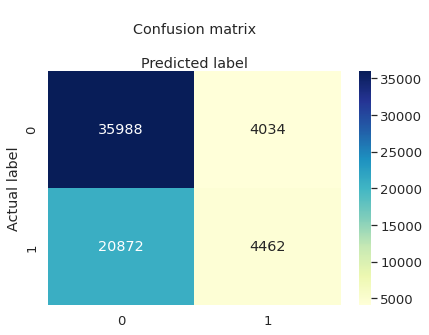

In [ ]:
#svm
%matplotlib inline
import seaborn as sns; sns.set(font_scale = 1.2)
from sklearn import svm

data = pd.read_csv("/content/mexico_covid19.csv")
data = data.drop([1048574])
data = data.dropna()
data = data.drop(data[(data['Age'] < 0) | (data['Sex'] == 98) | (data['Pneumonia'] == 98) | (data['Diabetes'] == 98) | (data['Ashma'] == 98) | (data['Hypertension'] == 98) | (data['CVDs'] == 98) | (data['Obesity'] == 98) |  (data['Result'] == 98) | (data['CKDs'] == 98) | (data['Tabacco'] == 98)].index)

x = data.values.astype(float)
scaler = preprocessing.MinMaxScaler()
x_scaled = scaler.fit_transform(x)
data = pd.DataFrame(x_scaled, columns=data.columns)

x = data.drop(['Result'], axis=1)
y = data.Result
C = 1.0
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=4)

svc = svm.SVC(kernel = 'linear', C = 1)
svc.fit(x_train, y_train)
y_pred = svc.predict(x_test)

# Confusion matrix of svm
cm = metrics.confusion_matrix(y_test, y_pred)
print('\nConfusion matrix\n', cm)
print('\nTrue Positive: ', cm[0, 0])
print('True Negative: ', cm[1, 1])
print('False Positive: ', cm[0, 1])
print('False Negative: ', cm[1, 0])

print(metrics.classification_report(y_test, y_pred))

# create heatmap 
fig, ax = plt.subplots()
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='d')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('\nConfusion matrix\n', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

svm_accuracy = metrics.accuracy_score(y_test, y_pred)
print('\nAccuracy score: {:.4f}'.format(svm_accuracy))

svm_precision = metrics.precision_score(y_test, y_pred)
print('Precision score: {:.4f}'.format(svm_precision))

svm_recall = metrics.recall_score(y_test, y_pred)
print('Recall score: {:.4f}'.format(svm_recall))

svm_f1_score = metrics.f1_score(y_test, y_pred)
print('F1 score: {:.4f}'.format(svm_f1_score))

svm_ROC_ACC = metrics.roc_auc_score(y_test, y_pred)
print('ROC AUC: {:.4f}'.format(svm_ROC_ACC))

svm_specificity = cm[0, 0] / (cm[0, 0] + cm[0, 1])
print('Specificity: {:.4f}'.format(svm_specificity))

svm_sensitivity = cm[1, 1] / (cm[1, 0] + cm[1, 1])
print('Sensitivity: {:.4f}'.format(svm_sensitivity))


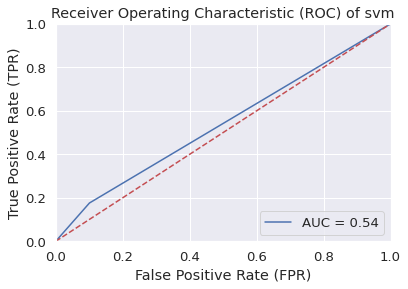

In [ ]:
# ROC Curve of svm
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred)

roc_auc = metrics.auc(fpr, tpr)

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate (TPR)')
plt.xlabel('False Positive Rate (FPR)')
plt.title('Receiver Operating Characteristic (ROC) of svm')
plt.legend(loc='lower right')
plt.show()


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)



Confusion matrix
 [[34459  5563]
 [17467  7867]]

True Positive:  34459
True Negative:  7867
False Positive:  5563
False Negative:  17467
              precision    recall  f1-score   support

         0.0       0.66      0.86      0.75     40022
         1.0       0.59      0.31      0.41     25334

    accuracy                           0.65     65356
   macro avg       0.62      0.59      0.58     65356
weighted avg       0.63      0.65      0.62     65356


Accuracy score: 0.6476
Precision score: 0.5858
Recall score: 0.3105
F1 score: 0.4059
ROC AUC: 0.5858
Specificity: 0.8610
Sensitivity: 0.3105


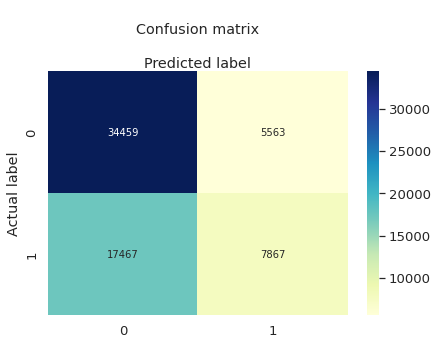

In [ ]:
#kNN
%matplotlib inline
from operator import itemgetter
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier

data = pd.read_csv("/content/mexico_covid19.csv")
data = data.drop([1048574])
data = data.dropna()
data = data.drop(data[(data['Age'] < 0) | (data['Sex'] == 98) | (data['Pneumonia'] == 98) | (data['Diabetes'] == 98) | (data['Ashma'] == 98) | (data['Hypertension'] == 98) | (data['CVDs'] == 98) | (data['Obesity'] == 98) |  (data['Result'] == 98) | (data['CKDs'] == 98) | (data['Tabacco'] == 98)].index)

x = data.values.astype(float)
scaler = preprocessing.MinMaxScaler()
x_scaled = scaler.fit_transform(x)
data = pd.DataFrame(x_scaled, columns=data.columns)

cv_score = []
x = data.drop(['Result'], axis=1)
y = data.Result

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=4)

knn = KNeighborsClassifier(n_neighbors=57)

knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
y_train_pred = knn.predict(x_train)


cm = metrics.confusion_matrix(y_test, y_pred)
print('\nConfusion matrix\n', cm)
print('\nTrue Positive: ', cm[0, 0])
print('True Negative: ', cm[1, 1])
print('False Positive: ', cm[0, 1])
print('False Negative: ', cm[1, 0])

print(metrics.classification_report(y_test, y_pred))

TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

# create heatmap
fig, ax = plt.subplots()
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='d')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('\nConfusion matrix\n', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

kNN_accuracy = metrics.accuracy_score(y_test, y_pred)
print('\nAccuracy score: {:.4f}'.format(kNN_accuracy))

kNN_precision = metrics.precision_score(y_test, y_pred)
print('Precision score: {:.4f}'.format(kNN_precision))

kNN_recall = metrics.recall_score(y_test, y_pred)
print('Recall score: {:.4f}'.format(kNN_recall))

kNN_f1_score = metrics.f1_score(y_test, y_pred)
print('F1 score: {:.4f}'.format(kNN_f1_score))

kNN_ROC_ACC = metrics.roc_auc_score(y_test, y_pred)
print('ROC AUC: {:.4f}'.format(kNN_ROC_ACC))

kNN_specificity = cm[0, 0] / (cm[0, 0] + cm[0, 1])
print('Specificity: {:.4f}'.format(kNN_specificity))

kNN_sensitivity = cm[1, 1] / (cm[1, 0] + cm[1, 1])
print('Sensitivity: {:.4f}'.format(kNN_sensitivity))

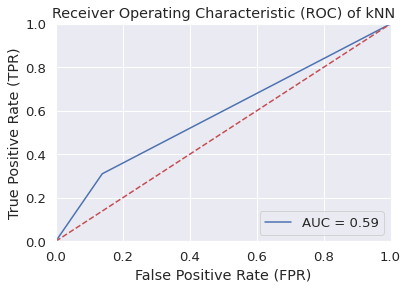

In [ ]:
# ROC Curve of kNN

fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred)

roc_auc = metrics.auc(fpr, tpr)

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate (TPR)')
plt.xlabel('False Positive Rate (FPR)')
plt.title('Receiver Operating Characteristic (ROC) of kNN')
plt.legend(loc='lower right')
plt.show()


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Confusion Matric
 [[34676  5346]
 [17999  7335]]
True Positive:  34676
True Negative:  7335
False Positive:  5346
False Negative:  17999 

Classification Report
               precision    recall  f1-score   support

         0.0       0.66      0.87      0.75     40022
         1.0       0.58      0.29      0.39     25334

    accuracy                           0.64     65356
   macro avg       0.62      0.58      0.57     65356
weighted avg       0.63      0.64      0.61     65356


Accuracy score: 0.6428
Precision score: 0.5784
Recall score: 0.2895
F1 score: 0.3859
ROC AUC: 0.5780
Specificity: 0.8664
Sensitivity: 0.2895


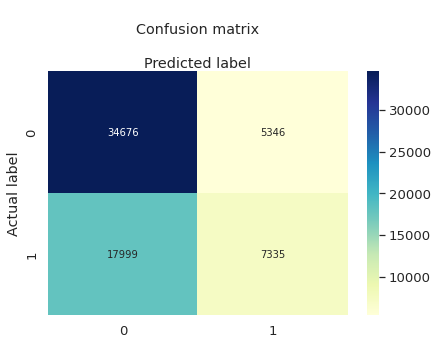

In [ ]:
#Naive Bayes
%matplotlib inline
from sklearn.naive_bayes import BernoulliNB
from sklearn import metrics
from sklearn.model_selection import cross_val_score

data = pd.read_csv("/content/mexico_covid19.csv")
data = data.drop([1048574])
data = data.dropna()
data = data.drop(data[(data['Age'] < 0) | (data['Sex'] == 98) | (data['Pneumonia'] == 98) | (data['Diabetes'] == 98) | (data['Ashma'] == 98) | (data['Hypertension'] == 98) | (data['CVDs'] == 98) | (data['Obesity'] == 98) |  (data['Result'] == 98) | (data['CKDs'] == 98) | (data['Tabacco'] == 98)].index)

x = data.values.astype(float)
scaler = preprocessing.MinMaxScaler()
x_scaled = scaler.fit_transform(x)
data = pd.DataFrame(x_scaled, columns=data.columns)

x = data.drop(['Result'], axis=1)
y = data.Result

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=4)

gnb = BernoulliNB()
gnb.fit(x_train, y_train)
y_pred = gnb.predict(x_test)

y_test.value_counts()


cm = metrics.confusion_matrix(y_test, y_pred)
print('Confusion Matric\n', cm)
print('True Positive: ', cm[0, 0])
print('True Negative: ', cm[1, 1])
print('False Positive: ', cm[0, 1])
print('False Negative: ', cm[1, 0],'\n')

cm_matrix = pd.DataFrame(data = cm, columns=['Actual Positive:1', 'Actual Negative:0'],
                         index=['Predict Positive:1', 'Predict Negative:0'])


print('Classification Report\n', metrics.classification_report(y_test, y_pred))

y_pred_pro_c1 = gnb.predict_proba(x_test)[:, 1]

# create heatmap
fig, ax = plt.subplots()
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='d')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('\nConfusion matrix\n', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

naive_accuracy = metrics.accuracy_score(y_test, y_pred)
print('\nAccuracy score: {:.4f}'.format(naive_accuracy))

naive_precision = metrics.precision_score(y_test, y_pred)
print('Precision score: {:.4f}'.format(naive_precision))

naive_recall = metrics.recall_score(y_test, y_pred)
print('Recall score: {:.4f}'.format(naive_recall))

naive_f1_score = metrics.f1_score(y_test, y_pred)
print('F1 score: {:.4f}'.format(naive_f1_score))

naive_ROC_ACC = metrics.roc_auc_score(y_test, y_pred)
print('ROC AUC: {:.4f}'.format(naive_ROC_ACC))

naive_specificity = cm[0, 0] / (cm[0, 0] + cm[0, 1])
print('Specificity: {:.4f}'.format(naive_specificity))

naive_sensitivity =  cm[1, 1] / (cm[1, 0] + cm[1, 1])
print('Sensitivity: {:.4f}'.format(naive_sensitivity))

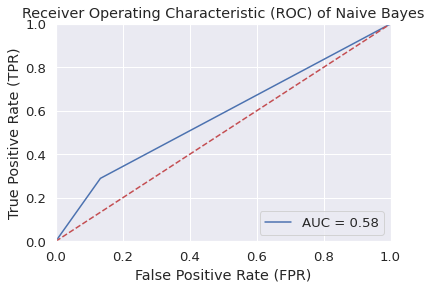

In [ ]:
# ROC Curve of Naive Bayes

fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred)

roc_auc = metrics.auc(fpr, tpr)

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate (TPR)')
plt.xlabel('False Positive Rate (FPR)')
plt.title('Receiver Operating Characteristic (ROC) of Naive Bayes')
plt.legend(loc='lower right')
plt.show()


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)



Confusion matrix
 [[34974  5048]
 [18149  7185]]

               precision    recall  f1-score   support

         0.0       0.66      0.87      0.75     40022
         1.0       0.59      0.28      0.38     25334

    accuracy                           0.65     65356
   macro avg       0.62      0.58      0.57     65356
weighted avg       0.63      0.65      0.61     65356


Accuracy score: 0.6451
Precision score: 0.5873
Recall score: 0.2836
F1 score: 0.3825
ROC AUC: 0.5787
Specificity: 0.8739
Sensitivity: 0.2836


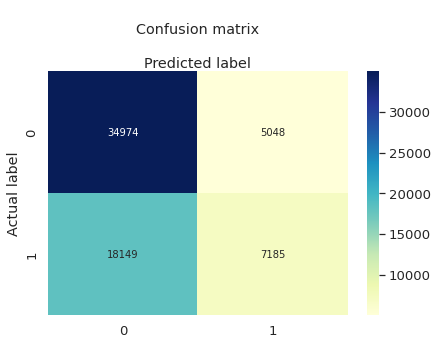

In [ ]:
#Decision tree
import graphviz
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
%matplotlib inline

data = pd.read_csv("/content/mexico_covid19.csv")
data = data.drop([1048574])
data = data.dropna()
data = data.drop(data[(data['Age'] < 0) | (data['Sex'] == 98) | (data['Pneumonia'] == 98) | (data['Diabetes'] == 98) | (data['Ashma'] == 98) | (data['Hypertension'] == 98) | (data['CVDs'] == 98) | (data['Obesity'] == 98) |  (data['Result'] == 98) | (data['CKDs'] == 98) | (data['Tabacco'] == 98)].index)

x = data.values.astype(float)
scaler = preprocessing.MinMaxScaler()
x_scaled = scaler.fit_transform(x)
data = pd.DataFrame(x_scaled, columns=data.columns)

x = data.drop(['Result'], axis=1)
y = data.Result

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=4)

dt_data = DecisionTreeClassifier()
dt_data.fit(x_train, y_train)


y_pred = dt_data.predict(x_test)


y_pred_train = dt_data.predict(x_train)

cm = metrics.confusion_matrix(y_test, y_pred)
print('\nConfusion matrix\n', cm)

print('\n',metrics.classification_report(y_test, y_pred))

# create heatmap
fig, ax = plt.subplots()
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='d')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('\nConfusion matrix\n', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

dtree_accuracy = metrics.accuracy_score(y_test, y_pred)
print('\nAccuracy score: {:.4f}'.format(dtree_accuracy))

dtree_precision = metrics.precision_score(y_test, y_pred)
print('Precision score: {:.4f}'.format(dtree_precision))

dtree_recall = metrics.recall_score(y_test, y_pred)
print('Recall score: {:.4f}'.format(dtree_recall))

dtree_f1_score = metrics.f1_score(y_test, y_pred)
print('F1 score: {:.4f}'.format(dtree_f1_score))

dtree_ROC_ACC = metrics.roc_auc_score(y_test, y_pred)
print('ROC AUC: {:.4f}'.format(dtree_ROC_ACC))

dtree_specificity = cm[0, 0] / (cm[0, 0] + cm[0, 1])
print('Specificity: {:.4f}'.format(dtree_specificity))

dtree_sensitivity =  cm[1, 1] / (cm[1, 0] + cm[1, 1])
print('Sensitivity: {:.4f}'.format(dtree_sensitivity))

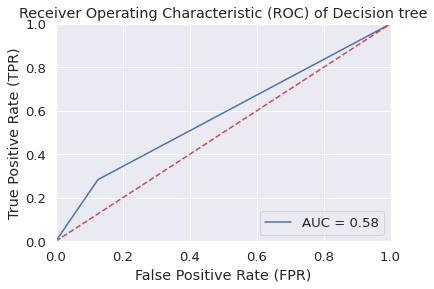

In [ ]:
# ROC Curve of Decision tree

fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred)

roc_auc = metrics.auc(fpr, tpr)

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate (TPR)')
plt.xlabel('False Positive Rate (FPR)')
plt.title('Receiver Operating Characteristic (ROC) of Decision tree')
plt.legend(loc='lower right')
plt.show()


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Feature Score:
Age             0.582734
Pneumonia       0.196506
Sex             0.045790
Diabetes        0.041703
Obesity         0.036649
Hypertension    0.026679
Tabacco         0.020963
CVDs            0.017484
CKDs            0.017085
Ashma           0.014408
dtype: float64

Confusion matrix
 [[34559  5463]
 [17770  7564]]

Classification Report:
               precision    recall  f1-score   support

         0.0       0.66      0.86      0.75     40022
         1.0       0.58      0.30      0.39     25334

    accuracy                           0.64     65356
   macro avg       0.62      0.58      0.57     65356
weighted avg       0.63      0.64      0.61     65356


Accuracy score: 0.6445
Precision score: 0.5806
Recall score: 0.2986
F1 score: 0.3944
ROC AUC: 0.5810
Specificity: 0.8635
Sensitivity: 0.2986


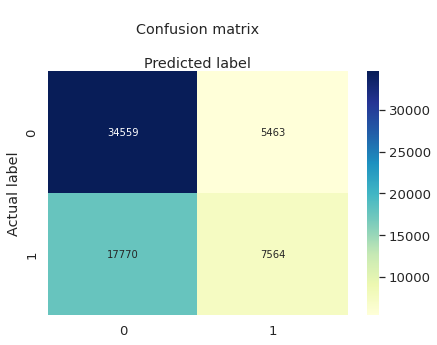

In [ ]:
#Random forest
from sklearn.ensemble import RandomForestClassifier

data = pd.read_csv("/content/mexico_covid19.csv")
data = data.drop([1048574])
data = data.dropna()
data = data.drop(data[(data['Age'] < 0) | (data['Sex'] == 98) | (data['Pneumonia'] == 98) | (data['Diabetes'] == 98) | (data['Ashma'] == 98) | (data['Hypertension'] == 98) | (data['CVDs'] == 98) | (data['Obesity'] == 98) |  (data['Result'] == 98) | (data['CKDs'] == 98) | (data['Tabacco'] == 98)].index)

x = data.values.astype(float)
scaler = preprocessing.MinMaxScaler()
x_scaled = scaler.fit_transform(x)
data = pd.DataFrame(x_scaled, columns=data.columns)

x = data.drop(['Result'], axis=1)
y = data.Result

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=4)

rfc = RandomForestClassifier(random_state = 0)

rfc.fit(x_train, y_train)


y_pred = rfc.predict(x_test)

feature_score = pd.Series(rfc.feature_importances_, index=x_train.columns).sort_values(ascending=False)
print('Feature Score:')
print(feature_score)

cm = metrics.confusion_matrix(y_test, y_pred)
print('\nConfusion matrix\n', cm)

print('\nClassification Report:\n',metrics.classification_report(y_test, y_pred))

# create heatmap
fig, ax = plt.subplots()
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='d')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('\nConfusion matrix\n', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

rand_for_accuracy = metrics.accuracy_score(y_test, y_pred)
print('\nAccuracy score: {:.4f}'.format(rand_for_accuracy))

rand_for_precision = metrics.precision_score(y_test, y_pred)
print('Precision score: {:.4f}'.format(rand_for_precision))

rand_for_recall = metrics.recall_score(y_test, y_pred)
print('Recall score: {:.4f}'.format(rand_for_recall))

rand_for_f1_score = metrics.f1_score(y_test, y_pred)
print('F1 score: {:.4f}'.format(rand_for_f1_score))

rand_for_ROC_ACC = metrics.roc_auc_score(y_test, y_pred)
print('ROC AUC: {:.4f}'.format(rand_for_ROC_ACC))

rand_for_specificity = cm[0, 0] / (cm[0, 0] + cm[0, 1])
print('Specificity: {:.4f}'.format(rand_for_specificity))

rand_for_sensitivity =  cm[1, 1] / (cm[1, 0] + cm[1, 1])
print('Sensitivity: {:.4f}'.format(rand_for_sensitivity))

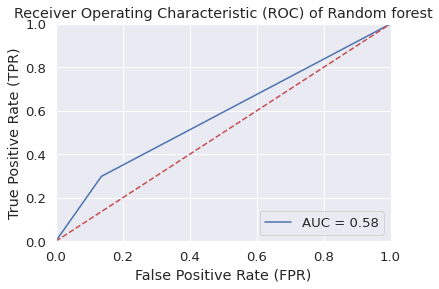

In [ ]:
# ROC Curve of Random forest
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred)

roc_auc = metrics.auc(fpr, tpr)

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate (TPR)')
plt.xlabel('False Positive Rate (FPR)')
plt.title('Receiver Operating Characteristic (ROC) of Random forest')
plt.legend(loc='lower right')
plt.show()


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 11)                121       
                                                                 
 dense_1 (Dense)             (None, 11)                132       
                                                                 
 dense_2 (Dense)             (None, 1)                 12        
                                                                 
Total params: 265
Trainable params: 265
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/200
6128/6128 [==============================] - 10s 2ms/step - loss: 0.6533 - accuracy: 0.6198
Epoch 2/200
6128/6128 [==============================] - 9s 2ms/step - loss: 0.6451 - accuracy: 0.6280
Epoch 3/200
6128/6128 [==============================] - 9s 2ms/step - loss: 0.6433 - accuracy: 0.6301
Epoch 4

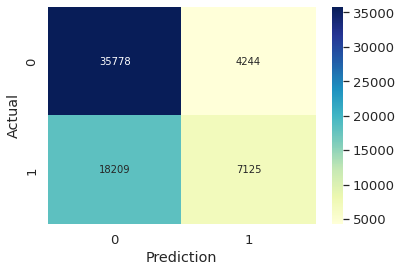

In [ ]:
#ANN
from keras.models import Sequential
from keras.layers import Dense

data = pd.read_csv("/content/mexico_covid19.csv")
data = data.drop([1048574])
data = data.dropna()
data = data.drop(data[(data['Age'] < 0) | (data['Sex'] == 98) | (data['Pneumonia'] == 98) | (data['Diabetes'] == 98) | (data['Ashma'] == 98) | (data['Hypertension'] == 98) | (data['CVDs'] == 98) | (data['Obesity'] == 98) |  (data['Result'] == 98) | (data['CKDs'] == 98) | (data['Tabacco'] == 98)].index)

x = data.values.astype(float)
scaler = preprocessing.MinMaxScaler()
x_scaled = scaler.fit_transform(x)
data = pd.DataFrame(x_scaled, columns=data.columns)

x = data.drop(['Result'], axis=1)
y = data.Result

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=4)


classifier = Sequential()

# Add the first hidden layer
classifier.add(Dense(units = 11, activation='sigmoid', input_dim = x_train.shape[1]))

# Add the second hidden layer
classifier.add(Dense(units = 11, activation='sigmoid'))

# Add the output layer
classifier.add(Dense(units = 1, activation='sigmoid'))
print(classifier.summary())

# Model Compilation 
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

# Train the model for 200 epochs
classifier.fit(x_train, y_train, epochs=200)

# Testing accuracy
scores = classifier.evaluate(x_train, y_train)
print("Training Accuracy: %.2f%%\n" % (scores[1]*100))

scores = classifier.evaluate(x_test, y_test)
print("Testing Accuracy: %.2f%% \n" % (scores[1]*100))

# Confusion matrix of ann
y_pred = (classifier.predict(x_test) > 0.5).astype("int32")
cm = metrics.confusion_matrix(y_test, y_pred)
ax = sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='d')
ax.set_xlabel("Prediction")
ax.set_ylabel("Actual")


ann_accuracy = metrics.accuracy_score(y_test, y_pred)
print('\nAccuracy score: {:.4f}'.format(ann_accuracy))

ann_precision = metrics.precision_score(y_test, y_pred)
print('Precision score: {:.4f}'.format(ann_precision))

ann_recall = metrics.recall_score(y_test, y_pred)
print('Recall score: {:.4f}'.format(ann_recall))

ann_f1_score = metrics.f1_score(y_test, y_pred)
print('F1 score: {:.4f}'.format(ann_f1_score))

ann_ROC_ACC = metrics.roc_auc_score(y_test, y_pred)
print('ROC AUC: {:.4f}'.format(ann_ROC_ACC))

ann_specificity = cm[0, 0] / (cm[0, 0] + cm[0, 1])
print('Specificity: {:.4f}'.format(ann_specificity))

ann_sensitivity =  cm[1, 1] / (cm[1, 0] + cm[1, 1])
print('Sensitivity: {:.4f}'.format(ann_sensitivity))

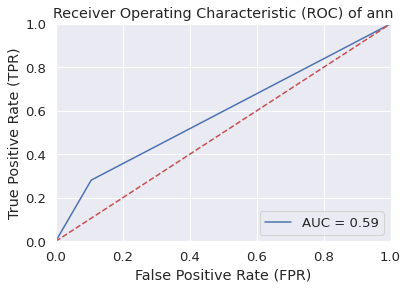

In [ ]:
# ROC Curve of ann

fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred)

roc_auc = metrics.auc(fpr, tpr)

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate (TPR)')
plt.xlabel('False Positive Rate (FPR)')
plt.title('Receiver Operating Characteristic (ROC) of ann')
plt.legend(loc='lower right')
plt.show()


In [ ]:
# Table of the comparison in the models
# initialize data of lists.
data = [{'Accuracy': log_reg_accuracy,
        'Precision': log_reg_precision,
        'Recall': log_reg_recall,
        'F1 score': log_reg_f1_score,
        'ROC AUC': log_reg_ROC_ACC,
        'Specificity': log_reg_specificity,
        'Sensitivity': log_reg_sensitivity,
        },
        {'Accuracy': svm_accuracy,
        'Precision': svm_precision,
        'Recall': svm_recall,
        'F1 score': svm_f1_score,
        'ROC AUC': svm_ROC_ACC,
        'Specificity': svm_specificity,
        'Sensitivity': svm_sensitivity,
        },
        {'Accuracy': kNN_accuracy,
        'Precision': kNN_precision,
        'Recall': kNN_recall,
        'F1 score': kNN_f1_score,
        'ROC AUC': kNN_ROC_ACC,
        'Specificity': kNN_specificity,
        'Sensitivity': kNN_sensitivity,
        },
        {'Accuracy': naive_accuracy,
        'Precision': naive_precision,
        'Recall': naive_recall,
        'F1 score': naive_f1_score,
        'ROC AUC': naive_ROC_ACC,
        'Specificity': naive_specificity,
        'Sensitivity': naive_sensitivity,
        },
        {'Accuracy': dtree_accuracy,
        'Precision': dtree_precision,
        'Recall': dtree_recall,
        'F1 score': dtree_f1_score,
        'ROC AUC': dtree_ROC_ACC,
        'Specificity': dtree_specificity,
        'Sensitivity': dtree_sensitivity,
        },
        {'Accuracy': rand_for_accuracy,
        'Precision': rand_for_precision,
        'Recall': rand_for_recall,
        'F1 score': rand_for_f1_score,
        'ROC AUC': rand_for_ROC_ACC,
        'Specificity': rand_for_specificity,
        'Sensitivity': rand_for_sensitivity,
        },
        {'Accuracy': ann_accuracy,
        'Precision': ann_precision,
        'Recall': ann_recall,
        'F1 score': ann_f1_score,
        'ROC AUC': ann_ROC_ACC,
        'Specificity': ann_specificity,
        'Sensitivity': ann_sensitivity,
        },
        ]


# Create DataFrame
df = pd.DataFrame(data , index=['Logistic Regression', 'SVM', 'kNN', 'Naiva Bayes', 'Decision Tree', 'Random Forest', 'ANN'])
  
# Print the output.
df



,Accuracy,Precision,Recall,F1 score,ROC AUC,Specificity,Sensitivity
Logistic Regression,0.639681,0.582160,0.249625,0.349421,0.568106,0.886587,0.249625
SVM,0.618918,0.525188,0.176127,0.263790,0.537666,0.899205,0.176127
kNN,0.647622,0.585778,0.310531,0.405892,0.585766,0.861001,0.310531
Naiva Bayes,0.642802,0.578424,0.289532,0.385900,0.577978,0.866423,0.289532
Decision Tree,0.645067,0.587346,0.283611,0.382517,0.578740,0.873869,0.283611
Random Forest,0.644516,0.580640,0.298571,0.394359,0.581036,0.863500,0.298571
ANN,0.656451,0.626704,0.281243,0.388252,0.587600,0.893958,0.281243


Text(0.5, 0, 'Algorithms Models')

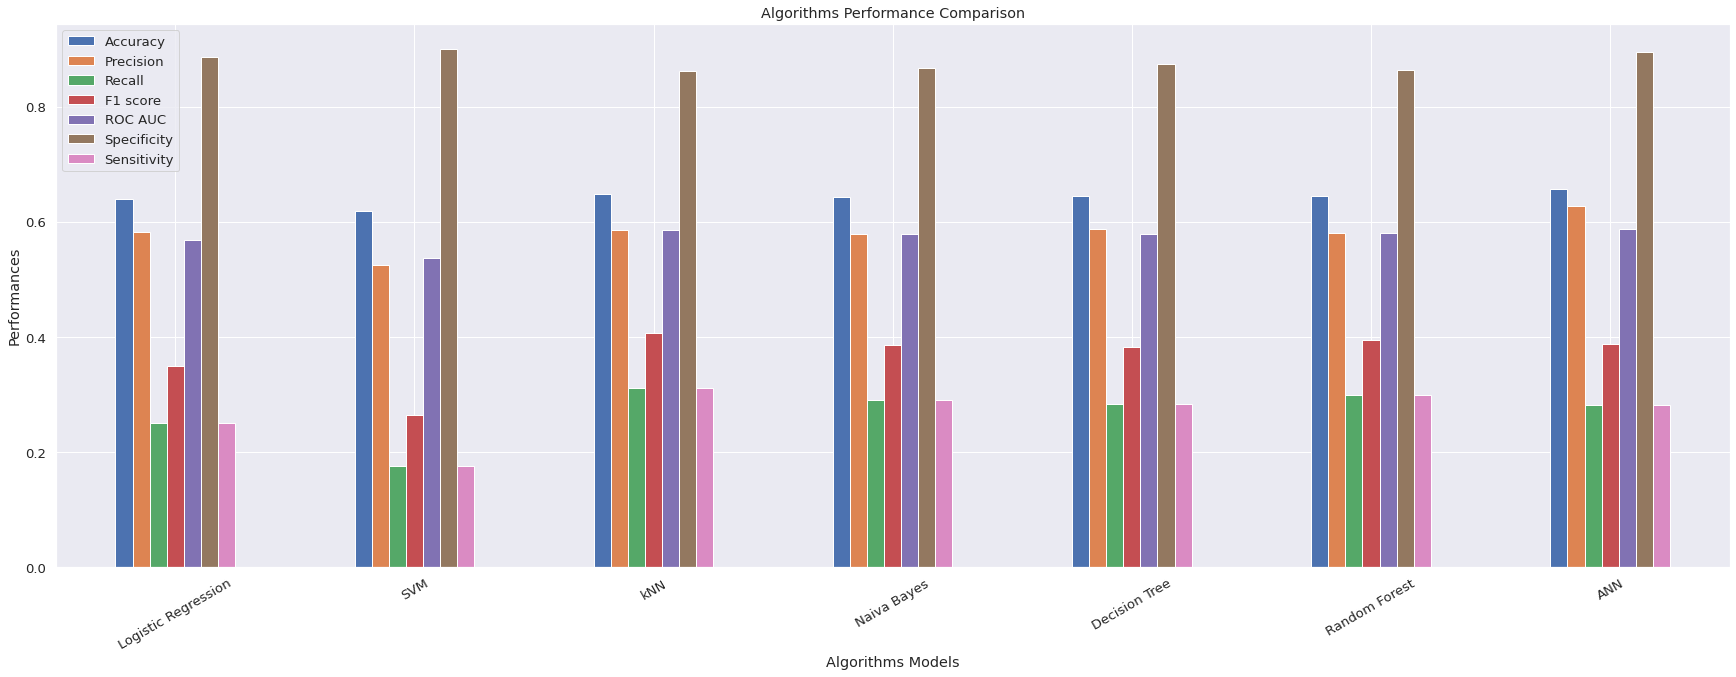

In [ ]:
# Graph of the comparison between models
plot = df.plot(kind='bar',  figsize=(30,10))
plt.xticks(rotation=30, horizontalalignment="center")
plt.title("Algorithms Performance Comparison")
plt.ylabel("Performances")
plt.xlabel("Algorithms Models")


Text(0.5, 0, 'Algorithms Models')

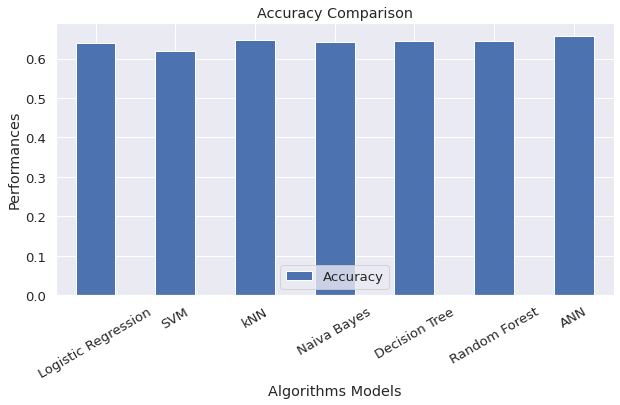

In [ ]:
# Graph of the comparison between models in accuracy
plot = df.plot( y='Accuracy', kind='bar',  figsize=(10,5))
plt.xticks(rotation=30, horizontalalignment="center")
plt.title("Accuracy Comparison")
plt.ylabel("Performances")
plt.xlabel("Algorithms Models")

Text(0.5, 0, 'Algorithms Models')

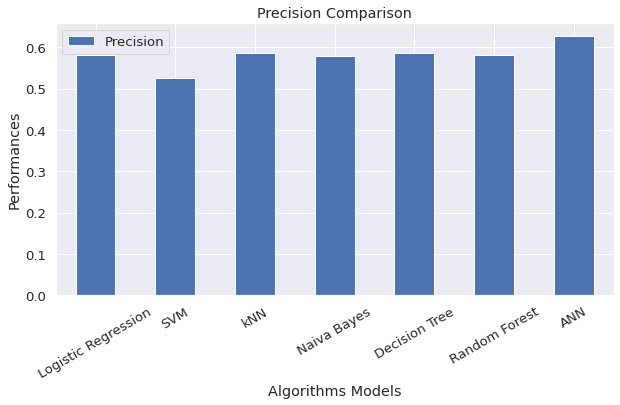

In [ ]:
# Graph of the comparison between models in Precision
plot = df.plot( y='Precision', kind='bar',  figsize=(10,5))
plt.xticks(rotation=30, horizontalalignment="center")
plt.title("Precision Comparison")
plt.ylabel("Performances")
plt.xlabel("Algorithms Models")

Text(0.5, 0, 'Algorithms Models')

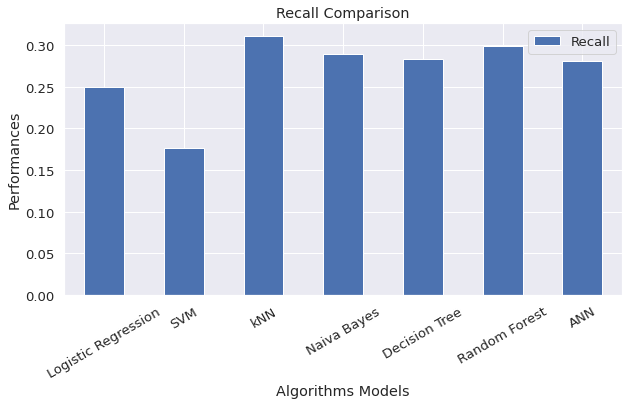

In [ ]:
# Graph of the comparison between models in Recall
plot = df.plot( y='Recall', kind='bar',  figsize=(10,5))
plt.xticks(rotation=30, horizontalalignment="center")
plt.title("Recall Comparison")
plt.ylabel("Performances")
plt.xlabel("Algorithms Models")

Text(0.5, 0, 'Algorithms Models')

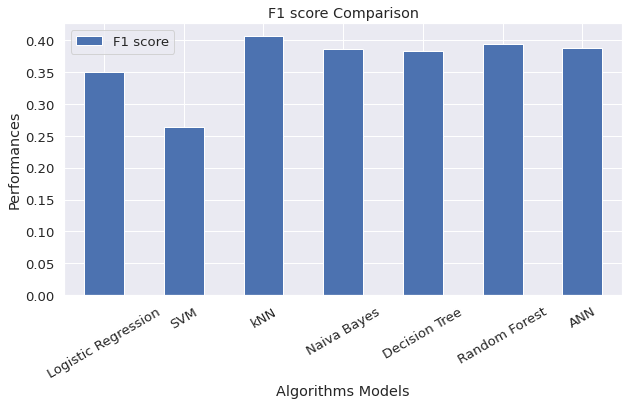

In [ ]:
# Graph of the comparison between models in F1 score
plot = df.plot( y='F1 score', kind='bar',  figsize=(10,5))
plt.xticks(rotation=30, horizontalalignment="center")
plt.title("F1 score Comparison")
plt.ylabel("Performances")
plt.xlabel("Algorithms Models")

Text(0.5, 0, 'Algorithms Models')

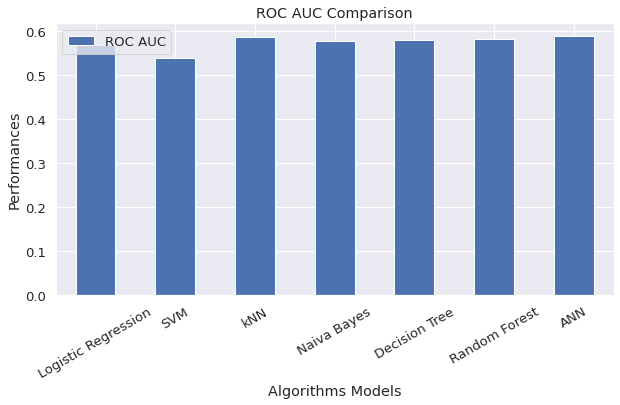

In [ ]:
# Graph of the comparison between models in ROC AUC
plot = df.plot( y='ROC AUC', kind='bar',  figsize=(10,5))
plt.xticks(rotation=30, horizontalalignment="center")
plt.title("ROC AUC Comparison")
plt.ylabel("Performances")
plt.xlabel("Algorithms Models")

Text(0.5, 0, 'Algorithms Models')

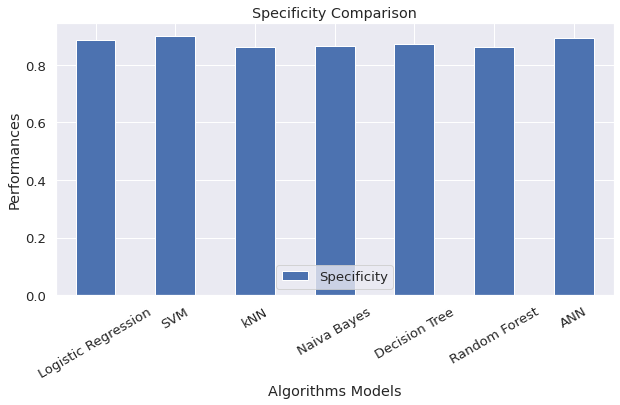

In [ ]:
# Graph of the comparison between models in Specificity
plot = df.plot( y='Specificity', kind='bar',  figsize=(10,5))
plt.xticks(rotation=30, horizontalalignment="center")
plt.title("Specificity Comparison")
plt.ylabel("Performances")
plt.xlabel("Algorithms Models")

Text(0.5, 0, 'Algorithms Models')

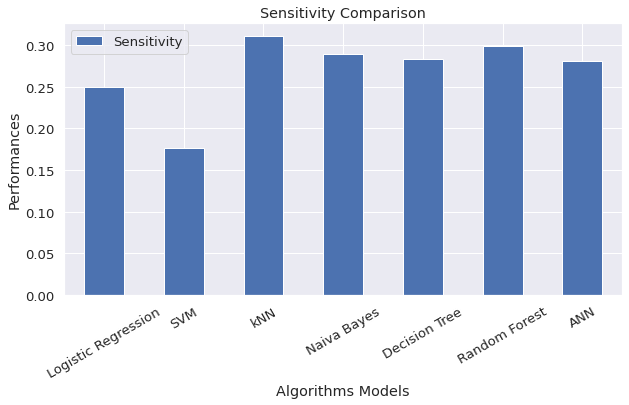

In [ ]:
# Graph of the comparison between models in Sensitivity
plot = df.plot( y='Sensitivity', kind='bar',  figsize=(10,5))
plt.xticks(rotation=30, horizontalalignment="center")
plt.title("Sensitivity Comparison")
plt.ylabel("Performances")
plt.xlabel("Algorithms Models")